In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from data import get_data, inspect_data, split_data

In [1]:
data = get_data()
inspect_data(data)

train_data, test_data = split_data(data)

NameError: name 'get_data' is not defined

In [ ]:
# Simple Linear Regression
# predict MPG (y, dependent variable) using Weight (x, independent variable) using closed-form solution
# y = theta_0 + theta_1 * x - we want to find theta_0 and theta_1 parameters that minimize the prediction error

# We can calculate the error using MSE metric:
# MSE = SUM (from i=1 to n) (actual_output - predicted_output) ** 2

# get the columns
y_train = train_data['MPG'].to_numpy()
x_train = train_data['Weight'].to_numpy()

y_test = test_data['MPG'].to_numpy()
x_test = test_data['Weight'].to_numpy()

In [ ]:
# TODO: calculate closed-form solution
x_train = x_train.reshape(-1, 1) # robi kołumnę
X = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
y_train = y_train.reshape(-1, 1)
# theta_best = np.linalg.inv(X.T @ X) @ (X.T @ y_train)
theta_best = np.linalg.solve(X.T @ X, X.T @ y_train)
# theta_best = [0, 0]

y_train_pred = X @ theta_best

x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))
y_test_pred = X_test @ theta_best

In [ ]:
# TODO: calculate error
def mse(y_pred, y):
    return np.mean((y_pred - y)**2)

mse_train = mse(y_train_pred, y_train)
mse_test = mse(y_test_pred, y_test)

print(f"{mse_train=}, {mse_test=}")


mse_train=np.float64(19.525262560353898), mse_test=np.float64(15.338692088640196)


/tmp/ipykernel_78792/669283611.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = float(theta_best[0]) + float(theta_best[1]) * x


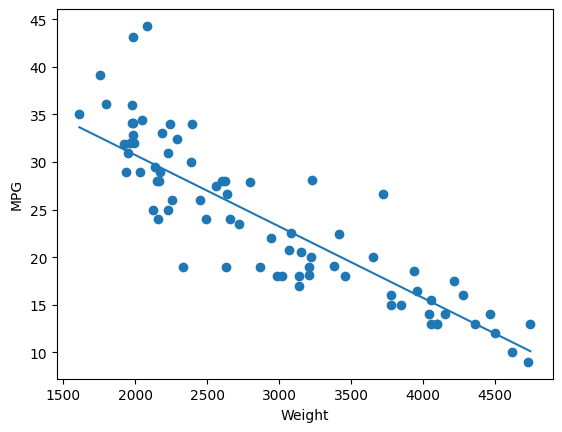

In [ ]:
# plot the regression line
x = np.linspace(min(x_test), max(x_test), 100)
y = float(theta_best[0]) + float(theta_best[1]) * x
plt.plot(x, y)
plt.scatter(x_test, y_test)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [ ]:
# TODO: standardization

xm = np.mean(X[:, 1])
xs = np.std(X[:, 1])

ym = np.mean(y_train) # średnia 
ys = np.std(y_train) # odchylenie standardowe

def standardize(x, m=None, s=None):

    if m is None:
        m = np.mean(x)
    if s is None:
        s = np.std(x)

    return (x-m)/s


X[:, 1] = standardize(X[:, 1])
X_test[:, 1] = standardize(X_test[:, 1])
y_train = standardize(y_train)

In [ ]:
# TODO: calculate theta using Full-Batch Gradient Descent

eta = 0.1

theta = np.random.randn(2, 1)
m = X.shape[0]

for epoch in range(1000):
    y_train_pred = X @ theta
    grad = 2/m * X.T @ (y_train_pred - y_train)
    theta -= eta * grad
    if epoch % 20 == 0:
        print(mse(y_train_pred, y_train))

3.6638993517603256
0.32836854843030877
0.3279251803378499
0.3279251214041217
0.3279251213962881
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871
0.3279251213962871


/tmp/ipykernel_78792/1778609563.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred = float(theta[0]) + float(theta[1]) * x


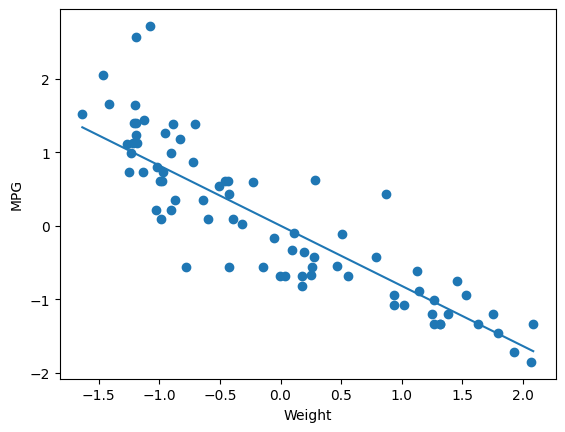

In [ ]:
# plot the regression line
x = np.linspace(min(x_test), max(x_test), 100)
#y = float(theta[0]) + float(theta[1]) * x

x = standardize(x, m=xm, s=xs)
y_pred = float(theta[0]) + float(theta[1]) * x

x_test = standardize(x_test, m=xm, s=xs)
y_test = standardize(y_test, m=ym, s=ys)

plt.plot(x, y_pred)
plt.scatter(x_test, y_test)
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

In [ ]:
# TODO: calculate error
y_test_pred = X_test @ theta

mse_grad_train = mse(y_train_pred, y_train)
mse_grad_test = mse(y_test_pred, y_test)

print(f"{mse_grad_train=}, {mse_grad_test=}")

mse_grad_train=np.float64(0.3279251213962871), mse_grad_test=np.float64(0.2692042647048197)


In [ ]:
# TODO: dodać jeszcze jeden czynnik (1/Waga), kolejną cechę i porównać błąd
# Jako dodatkową cechę wezmę Acceleration

# get the columns
y_train = train_data['MPG'].to_numpy()
x1_train = train_data['Weight'].to_numpy()
x2_train = train_data['Acceleration'].to_numpy()

y_test = test_data['MPG'].to_numpy()
x1_test = test_data['Weight'].to_numpy()
x2_test = test_data['Acceleration'].to_numpy()

x1_train = x1_train.reshape(-1, 1)
x2_train = x2_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X = np.hstack((np.ones((x1_train.shape[0], 1)), x1_train, x2_train))

y_test = y_test.reshape(-1, 1)
x1_test = x1_test.reshape(-1, 1)
x2_test = x2_test.reshape(-1, 1)

X_test = np.hstack((np.ones((x1_test.shape[0], 1)), x1_test, x2_test))


In [ ]:
# Standardization

xm = np.mean(X[:, 1:], axis=0)
xs = np.std(X[:, 1:], axis=0)

ym = np.mean(y_train) # średnia 
ys = np.std(y_train) # odchylenie standardowe

def standardize(x, m=None, s=None):

    if m is None:
        m = np.mean(x)
    if s is None:
        s = np.std(x)

    return (x-m)/s


X[:, 1:] = standardize(X[:, 1:])
X_test[:, 1:] = standardize(X_test[:, 1:])
y_train = standardize(y_train)

In [ ]:
# Calculate theta using Full-Batch Gradient Descent

eta = 0.1

theta = np.random.randn(3, 1)
m = X.shape[0]

for epoch in range(1000):
    y_train_pred = X @ theta
    grad = 2/m * X.T @ (y_train_pred - y_train)
    theta -= eta * grad
    if epoch % 20 == 0:
        print(mse(y_train_pred, y_train))

0.6487901158054519
0.37533614193221904
0.3387699958775903
0.3305063897506975
0.3286388653315384
0.3282167893182354
0.3281213697160477
0.3280997710893512
0.32809485524104764
0.3280937095287317
0.328093415828585
0.32809331467476377
0.3280932570347986
0.3280932092288904
0.32809316364575253
0.32809311856531287
0.32809307359885287
0.32809302865852613
0.3280929837244802
0.3280929387922287
0.32809289386075774
0.32809284892983825
0.32809280399941826
0.32809275906948626
0.3280927141400395
0.3280926692110774
0.32809262428259983
0.3280925793546067
0.328092534427098
0.3280924895000739
0.3280924445735341
0.3280923996474788
0.32809235472190806
0.3280923097968217
0.3280922648722197
0.32809221994810217
0.32809217502446913
0.3280921301013205
0.3280920851786561
0.3280920402564763
0.3280919953347809
0.32809195041356987
0.32809190549284317
0.3280918605726009
0.328091815652843
0.32809177073356954
0.32809172581478036
0.3280916808964756
0.3280916359786552
0.32809159106131913
Theta after gradient:  [[ 0.68434

In [ ]:
# Calculate error
y_test_pred = X_test @ theta

mse_grad_train = mse(y_train_pred, y_train)
mse_grad_test = mse(y_test_pred, y_test)

print(f"{mse_grad_train=}, {mse_grad_test=}")

mse_grad_train=np.float64(0.3280915483902985), mse_grad_test=np.float64(0.26266563264947485)
